# SmartBeds - Preprocesado de Datos

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt

In [2]:
import pickle as pk

### Lectura

In [3]:
import loadData as ld

datos = ld.load(r"../data/")
datos = ld.preprocess(datos)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
766340,2018-11-05 21:02:55,3.0,20.0,25.0,18.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
766341,2018-11-05 21:02:56,3.0,22.0,27.0,19.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
766342,2018-11-05 21:02:57,3.0,21.0,27.0,19.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
766343,2018-11-05 21:02:57,3.0,22.0,27.0,19.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False
766344,2018-11-05 21:02:58,4.0,23.0,28.0,19.0,3.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,False


### Datos manuales

In [4]:
datos = ld.newSeizure(datos,'2018-11-10 3:30:00',60*20)

### Preprocesado

In [5]:
# Ordención
datos = datos.sort_values(by='DateTime')

In [6]:
# Eliminación de negativos y filtrado
for d in datos:
    if datos[d].dtype == np.float64:
        datos.loc[datos[d]<5.0,d]=0.0
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
4041241,2018-10-30 21:23:01,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041242,2018-10-30 21:23:02,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041243,2018-10-30 21:23:03,0.0,20.0,26.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041244,2018-10-30 21:23:04,0.0,20.0,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041245,2018-10-30 21:23:05,0.0,20.0,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [7]:
# Normalización
tubesNorm = ld.normalize(datos.iloc[:,1:13])
datos=pd.concat([datos['DateTime'],tubesNorm*100,datos['target']],axis=1)
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,target
4041241,2018-10-30 21:23:01,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041242,2018-10-30 21:23:02,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041243,2018-10-30 21:23:03,0.0,20.618557,26.804124,22.680412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041244,2018-10-30 21:23:04,0.0,20.618557,26.804124,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4041245,2018-10-30 21:23:05,0.0,20.618557,26.804124,21.649485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [8]:
with open('data/datos_raw.pdd','wb') as f:
    pk.dump(datos,f)

In [9]:
# Suavizado
from scipy import signal

dt = datos.iloc[:,1:13]
dtN = dt.copy()
b, a = signal.butter(3, 0.05)
for i in range(len(dt.columns)):
    xn = dt.iloc[:,i]
    y = signal.filtfilt(b, a, xn)
    dtN["P"+str(i+1)]=y
dtN.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
4041241,1.828043e-322,20.610966,26.797474,22.687624,-2.276321e-23,-2.633068e-24,2.025669e-322,0.0,-1.729230e-322,1.482197e-322,-2.865581e-322,-2.223295e-322
4041242,1.926856e-322,20.629508,26.807291,22.631796,-2.459767e-23,-2.817358e-24,1.828043e-322,0.0,-1.828043e-322,1.383384e-322,-2.865581e-322,-2.173889e-322
4041243,2.025669e-322,20.648656,26.816170,22.578344,-2.608638e-23,-2.957664e-24,1.581010e-322,0.0,-1.926856e-322,1.185758e-322,-2.865581e-322,-2.124482e-322
4041244,2.075076e-322,20.668159,26.823822,22.527650,-2.713090e-23,-3.042774e-24,1.284571e-322,0.0,-2.025669e-322,8.893182e-323,-2.865581e-322,-2.124482e-322
4041245,2.124482e-322,20.687767,26.829992,22.480037,-2.762795e-23,-3.061047e-24,9.387247e-323,0.0,-2.075076e-322,5.434722e-323,-2.865581e-322,-2.173889e-322


In [10]:
## Eliminación de tubos con poca varianza
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.5)
presiones_array = sel.fit_transform(dtN)
presiones_array[presiones_array<1e-4]=0

In [11]:
for i in range(1,len(presiones_array[0])+1):
    datos['P'+str(i)]=presiones_array[:,i-1]
listNames = ['DateTime']
for i in range(1,len(presiones_array[0])+1):
    listNames.append("P"+str(i))
listNames.append('target')
datos = datos[listNames]
datos.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
4041241,2018-10-30 21:23:01,0.0,20.610966,26.797474,22.687624,0.0,0.0,False
4041242,2018-10-30 21:23:02,0.0,20.629508,26.807291,22.631796,0.0,0.0,False
4041243,2018-10-30 21:23:03,0.0,20.648656,26.816170,22.578344,0.0,0.0,False
4041244,2018-10-30 21:23:04,0.0,20.668159,26.823822,22.527650,0.0,0.0,False
4041245,2018-10-30 21:23:05,0.0,20.687767,26.829992,22.480037,0.0,0.0,False


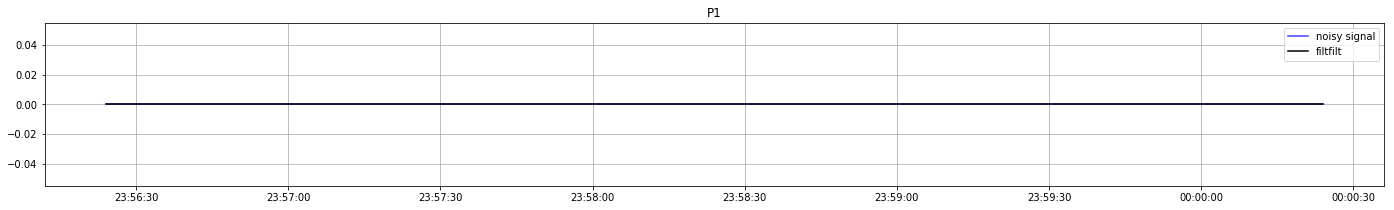

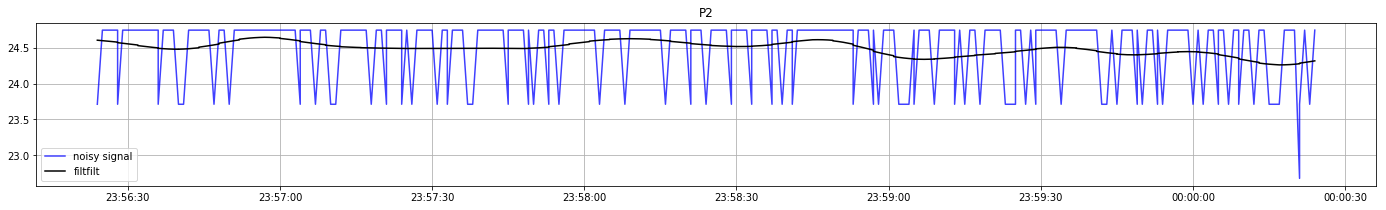

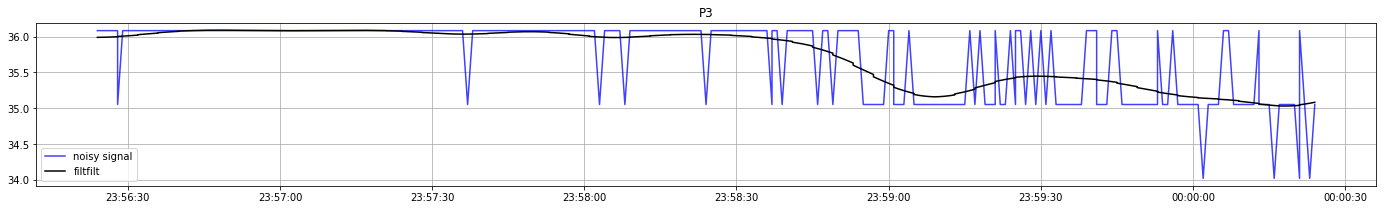

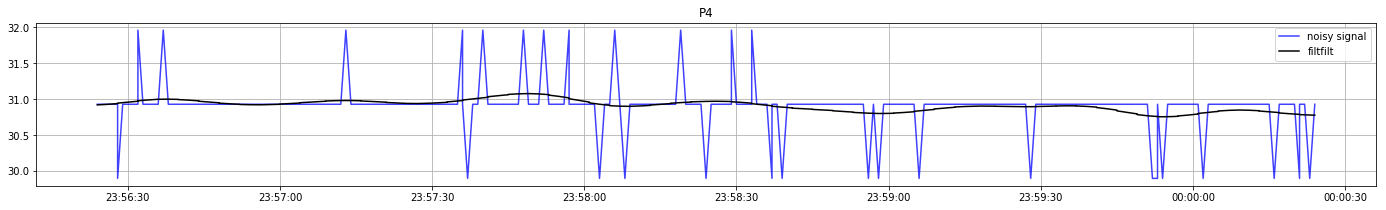

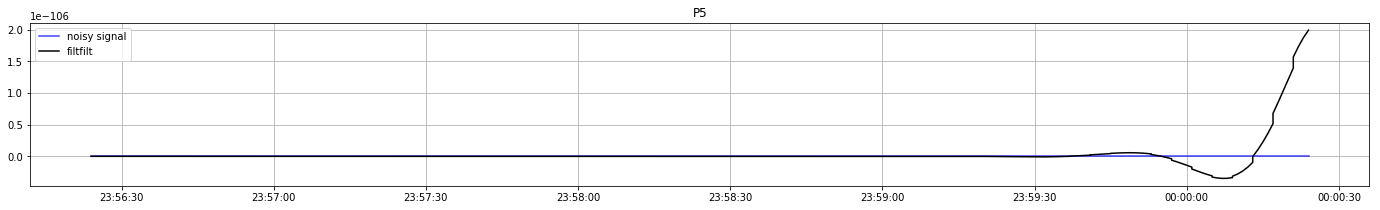

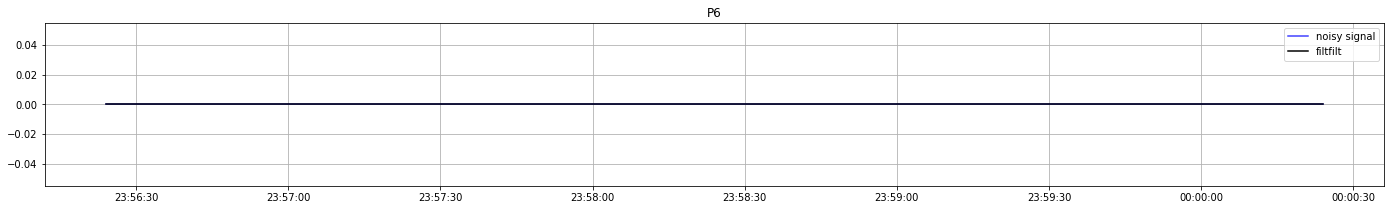

In [12]:
t = datos['DateTime'][11500:11800]
for i in datos.iloc[:,1:len(datos.columns)-1]:
    plt.figure(figsize=(24,3))
    plt.plot(t, dt[i][11500:11800], 'b', alpha=0.75)
    plt.plot(t, dtN[i][11500:11800], 'k')
    plt.legend(('noisy signal','filtfilt'), loc='best')
    plt.title(i)
    plt.grid(True)
    plt.savefig(i+".svg")

### Cálculo de las  estadísticas móviles
#### Widgets

In [26]:
import gc
gc.collect()

66

In [14]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(
    value=25,
    min=1,
    max=50,
    description='Ventana:',
    readout=True,
    readout_format='d'
)

button = widgets.Button(
    description='Calcular'
)

progress = widgets.IntProgress(
    value=0,
    min=0,
    max=12,
    step=1,
    description='Procesado:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

hb = widgets.HBox([slider,button,progress])

In [27]:
display(hb)



def estadisticos(b):
    global slider, dataE, progress
    dataE = datos.copy()
    progress.value = 0
    progress.max = (len(dataE.columns)-2)*3
    
    before = b.description
    b.description='Espera'

    print(" "*100,end='\r')
    
    ventanaMedia = slider.value
    
    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_mean = nombre_col+' mean'
        dataE[nombre_col_mean] = dataE[nombre_col].rolling(ventanaMedia).mean()
        progress.value += 1

    ventanaDesviacion = ventanaMedia

    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' std'
        dataE[nombre_col_std] = dataE[nombre_col].rolling(ventanaDesviacion).std()
        progress.value += 1
        
    ventanaRango = ventanaMedia

    for i in range(1,len(datos.columns)-1):
        nombre_col = 'P'+str(i)
        nombre_col_std = nombre_col+' range'
        roll = dataE[nombre_col].rolling(ventanaRango)
        dataE[nombre_col_std] = roll.max()-roll.min()
        progress.value += 1
        
    print('Calculos realizados para ventana a',ventanaMedia,end="\r")
    b.description = before
        
    dataE = dataE.dropna()
    
    indices = []

    ataques = dataE.loc[dataE['target'] == True]
    for index, row in ataques.iterrows(): 
        if dataE.loc[index-1,'target'] == False: 
            indices.append(index)

    for i in indices: 
        dataE.loc[i:i+ventanaMedia-1,'target'] = False
    

button.on_click(estadisticos)


#### Normalización de los estadísticos

In [28]:
dataMean = dataE[[x for x in dataE.columns if 'mean' in x]]
dataStd = dataE[[x for x in dataE.columns if 'std' in x]]
dataRank = dataE[[x for x in dataE.columns if 'range' in x]]

In [29]:
dataE.head()

,DateTime,P1,P2,P3,P4,P5,P6,target,P1 mean,P2 mean,...,P3 std,P4 std,P5 std,P6 std,P1 range,P2 range,P3 range,P4 range,P5 range,P6 range
4041265,2018-10-30 21:23:21,0.0,20.914878,26.724343,22.221226,0.0,0.0,False,0.0,20.800707,...,0.040879,0.157421,0.0,0.0,0.0,0.303912,0.113366,0.507798,0.0,0.0
4041266,2018-10-30 21:23:21,0.0,20.915152,26.725124,22.233417,0.0,0.0,False,0.0,20.812874,...,0.042920,0.137113,0.0,0.0,0.0,0.285645,0.113366,0.451970,0.0,0.0
4041267,2018-10-30 21:23:22,0.0,20.913965,26.727605,22.246343,0.0,0.0,False,0.0,20.824253,...,0.044379,0.117786,0.0,0.0,0.0,0.266496,0.113366,0.398519,0.0,0.0
4041268,2018-10-30 21:23:23,0.0,20.911287,26.731713,22.259700,0.0,0.0,False,0.0,20.834758,...,0.045118,0.099797,0.0,0.0,0.0,0.246993,0.113366,0.347825,0.0,0.0
4041269,2018-10-30 21:23:24,0.0,20.907125,26.737323,22.273192,0.0,0.0,False,0.0,20.844317,...,0.045066,0.083577,0.0,0.0,0.0,0.227386,0.113366,0.300211,0.0,0.0


### Exportación

In [30]:
with open('data/datos.pdd','wb') as f:
    pk.dump(datos,f)
    
with open('data/datosE.pdd','wb') as f:
    pk.dump(dataE,f)